##### 搭配 pyaudio 實作簡單錄音機
這篇教學會使用 PyQt5 結合「麥克風錄音」範例，實際做出一個可以透過電腦麥克風，進行錄音和存檔的簡單錄音機。

##### 範例程式說明 
首先使用 PyQt5 做出一個簡單的介面，介面裡包含兩顆按鈕 ( 錄音和停止 )，以及一個 QLabel 顯示文字提示，接著加入「麥克風錄音」文章裡的錄音程式，\
詳細解說在程式碼的註解中，下方列出一些重點：
* 因為錄音必須使用 while 迴圈，所以需要透過 threading 放在另外的執行緒中執行。
* 錄音的開始和結束，使用 threading 的「事件觸發」功能，當觸發了事件才會繼續進行。
* 存檔時使用 PyQt5 內建的彈出輸入視窗，輸入檔名之後就會存檔。

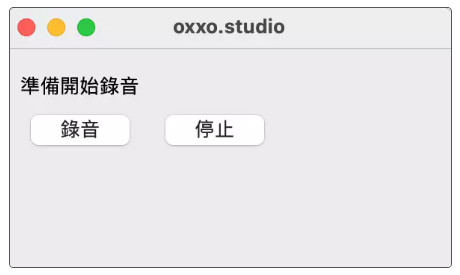

In [ ]:
from PyQt5 import QtWidgets
import pyaudio
import sys, wave, threading, random

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)   # 在 Form 中加入一個 QLabel
label.setGeometry(10, 10, 200, 30)
label.setText('準備開始錄音')

chunk = 1024                     # 記錄聲音的樣本區塊大小
sample_format = pyaudio.paInt16  # 樣本格式，可使用 paFloat32、paInt32、paInt24、paInt16、paInt8、paUInt8、paCustomFormat
channels = 2                     # 聲道數量
fs = 44100                       # 取樣頻率，常見值為 44100 ( CD )、48000 ( DVD )、22050、24000、12000 和 11025。
seconds = 5                      # 錄音秒數

def recording():
    global run, name, ok
    while True:
        event.wait()            # 等待事件被觸發
        event.clear()           # 觸發後將事件回歸原本狀態
        run = True              # 設定 run 為 True 表示開始錄音
        print('開始錄音...')
        p = pyaudio.PyAudio()   # 建立 pyaudio 物件
        stream = p.open(format=sample_format, channels=channels, rate=fs, frames_per_buffer=chunk, input=True)
        frames = [] 
        while run:
            data = stream.read(chunk)
            frames.append(data)          # 將聲音記錄到串列中
        print('停止錄音')
        stream.stop_stream()             # 停止錄音
        stream.close()                   # 關閉串流
        p.terminate()
        event2.wait()                    # 等待事件被觸發
        event2.clear()                   # 觸發後將事件回歸原本狀態
        # 如果存檔按下確定，表示要儲存
        if ok == True:
            wf = wave.open(f'{name}.wav', 'wb')   # 開啟聲音記錄檔
            wf.setnchannels(channels)             # 設定聲道
            wf.setsampwidth(p.get_sample_size(sample_format))  # 設定格式
            wf.setframerate(fs)                   # 設定取樣頻率
            wf.writeframes(b''.join(frames))      # 存檔
            wf.close()
        else:
            pass

event = threading.Event()   # 註冊錄音事件
event2 = threading.Event()  # 註冊停止錄音事件
record = threading.Thread(target=recording)     # 將錄音的部分放入 threading 裡執行
record.start()

# 開始錄音
def start():
    btn1.setDisabled(True)
    btn2.setDisabled(False)
    label.setText('錄音中....')
    event.set()      # 觸發錄音開始事件

# 停止錄音
def stop():
    global run, name, ok
    btn1.setDisabled(False)
    btn2.setDisabled(True)
    label.setText('停止錄音')
    run = False       # 設定 run 為 False 停止錄音迴圈
    name, ok = QtWidgets.QInputDialog().getText(Form, '$', '存檔的檔名？')
    print(name, ok)
    if name == '':
        name = str(random.random()*10).replace('.','')  # 如果沒有檔名，使用 random 產生
    event2.set()      # 觸發錄音停止事件

btn1 = QtWidgets.QPushButton(Form)   # 在 Form 中加入一個 QPushButton
btn1.setGeometry(10,40,80,30)
btn1.setText('錄音')                 # 按鈕文字
btn1.clicked.connect(start)

btn2 = QtWidgets.QPushButton(Form)   # 在 Form 中加入一個 QPushButton
btn2.setGeometry(100,40,80,30)
btn2.setText('停止')                 # 按鈕文字
btn2.clicked.connect(stop)

Form.show()
sys.exit(app.exec_())